In [56]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import struct
from astropy.table import join

In [2]:
kois = Table.read("apogee_KOI_join.fits", format='fits')

In [3]:
kois.colnames

['KIC',
 '_r',
 '_RAJ2000',
 '_DEJ2000',
 'APOGEE',
 'Tel',
 'Loc',
 'RAJ2000_1',
 'DEJ2000_1',
 'Ak',
 'E(B-V)',
 'Nvis',
 'SNR',
 'SNREV',
 'SaFlag',
 'HRV',
 's_HRV',
 'e_HRV',
 'GaiaEDR3',
 'Chi2',
 'AFlag',
 'PMm',
 'Teff',
 'e_Teff_1',
 'logg',
 'e_logg_1',
 '[M/H]',
 'e_[M/H]',
 '[a/M]',
 'e_[a/M]',
 'Vmicro',
 'Vmacro',
 'Vsini',
 '[C/Fe]',
 'e_[C/Fe]',
 'f_[C/Fe]',
 '[CI/Fe]',
 'e_[CI/Fe]',
 'f_[CI/Fe]',
 '[N/Fe]',
 'e_[N/Fe]',
 'f_[N/Fe]',
 '[O/Fe]',
 'e_[O/Fe]',
 'f_[O/Fe]',
 '[Na/Fe]',
 'e_[Na/Fe]',
 'f_[Na/Fe]',
 '[Mg/Fe]',
 'e_[Mg/Fe]',
 'f_[Mg/Fe]',
 '[Al/Fe]',
 'e_[Al/Fe]',
 'f_[Al/Fe]',
 '[Si/Fe]',
 'e_[Si/Fe]',
 'f_[Si/Fe]',
 '[S/Fe]',
 'e_[S/Fe]',
 'f_[S/Fe]',
 '[K/Fe]',
 'e_[K/Fe]',
 'f_[K/Fe]',
 '[Ca/Fe]',
 'e_[Ca/Fe]',
 'f_[Ca/Fe]',
 '[Ti/Fe]',
 'e_[Ti/Fe]',
 'f_[Ti/Fe]',
 '[TiII/Fe]',
 'e_[TiII/Fe]',
 'f_[TiII/Fe]',
 '[V/Fe]',
 'e_[V/Fe]',
 'f_[V/Fe]',
 '[Cr/Fe]',
 'e_[Cr/Fe]',
 'f_[Cr/Fe]',
 '[Mn/Fe]',
 'e_[Mn/Fe]',
 'f_[Mn/Fe]',
 '[Fe/H]',
 'e_[Fe/H]_1',
 'f_[F

Text(0.5, 0, 'SNR')

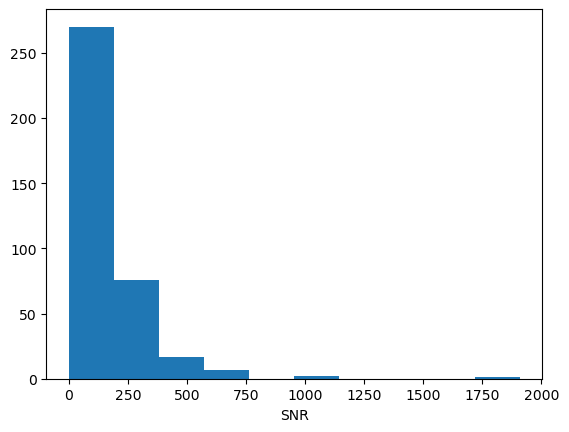

In [4]:
plt.hist(np.array(kois['SNR']).astype(float))
plt.xlabel("SNR")

In [5]:
dopp_params = ['Teff', 'logg', '[Fe/H]']
deltas = [100, .1, .05]

In [6]:

for param in dopp_params:
    for i in range(len(kois)):
        try:
            kois[param][i] = np.array(kois[param][i]).astype(float)
            
        except:
            kois[param][i] = np.nan

    kois[param] = kois[param].astype(float)

In [7]:
sn = np.where(kois['Radius'] > 2 )
se = np.where(kois['Radius'] < 1.8)

(array([ 6., 13., 19., 12., 22., 23., 27., 24., 18., 16.]),
 array([0.51 , 0.638, 0.766, 0.894, 1.022, 1.15 , 1.278, 1.406, 1.534,
        1.662, 1.79 ]),
 <BarContainer object of 10 artists>)

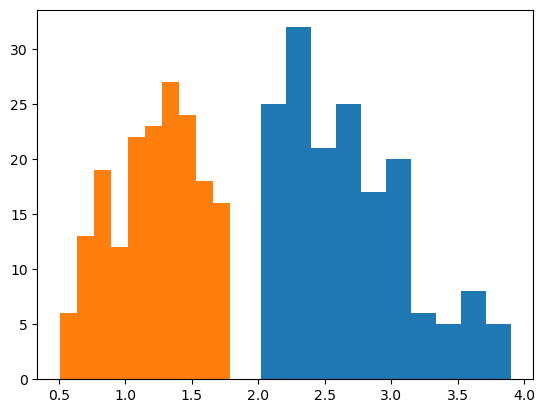

In [8]:
plt.hist(kois[sn]['Radius'])
plt.hist(kois[se]['Radius'])

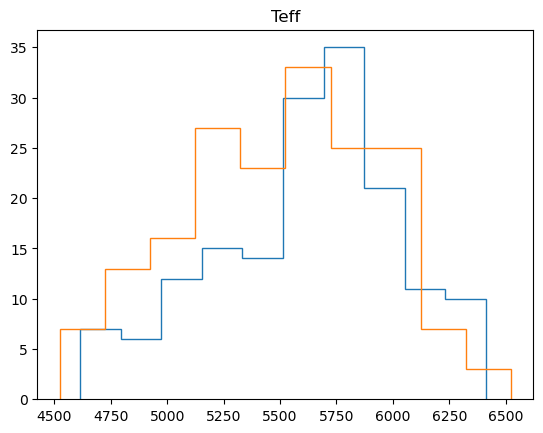

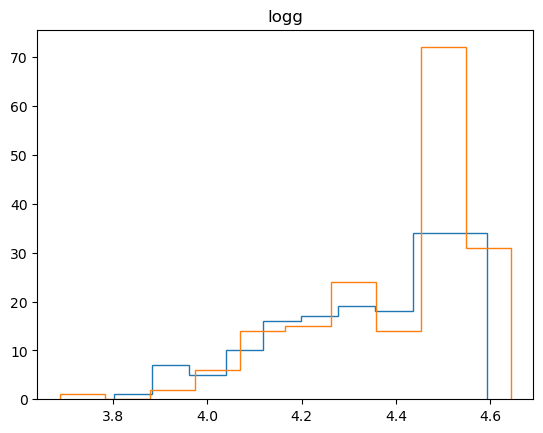

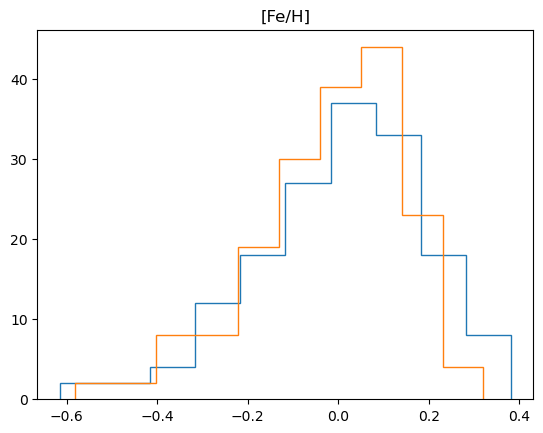

In [9]:
for param in dopp_params:
    plt.hist(kois[sn][param], histtype='step')
    plt.hist(kois[se][param], histtype='step')
    plt.title(param)
    plt.show()

In [54]:

print('finding doppelgangers with these parameters:')
print(dopp_params)
print('$\delta$ < : ', deltas)
print('\n\n\n')

pop = kois[sn]
ref = kois[se]
pop['doppelganger_apogee_id'] = np.repeat('                                                            ', len(pop))
for ind, star in enumerate(pop):
    dopps = ref
    param_dists = np.array([])
    for j, param in enumerate(dopp_params):
        dopps = dopps[np.where(np.abs(star[param]-dopps[param]) < deltas[j])]
    for j, param in enumerate(dopp_params):
        param_dists = np.append(param_dists, [np.array(((star[param] - dopps[param])/deltas[j])**2)])
    dists = np.nansum(param_dists.reshape(len(dopp_params), len(dopps)), axis=0)
    if len(dopps) > 0:
        nearest = np.where(dists == np.nanmin(dists))
        nearest_apid = dopps['APOGEE'][nearest]
        pop['doppelganger_apogee_id'][ind] = nearest_apid.value.astype(str)[0]

pop
    
    # dists = np.sqrt(np.nansum[np.array(param_dists)])
    # print(dists)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2086466/2554732571.py:3: SyntaxWarning: invalid escape sequence '\d'
  print('$\delta$ < : ', deltas)


finding doppelgangers with these parameters:
['Teff', 'logg', '[Fe/H]']
$\delta$ < :  [100, 0.1, 0.05]






KIC,_r,_RAJ2000,_DEJ2000,APOGEE,Tel,Loc,RAJ2000_1,DEJ2000_1,Ak,E(B-V),Nvis,SNR,SNREV,SaFlag,HRV,s_HRV,e_HRV,GaiaEDR3,Chi2,AFlag,PMm,Teff,e_Teff_1,logg,e_logg_1,[M/H],e_[M/H],[a/M],e_[a/M],Vmicro,Vmacro,Vsini,[C/Fe],e_[C/Fe],f_[C/Fe],[CI/Fe],e_[CI/Fe],f_[CI/Fe],[N/Fe],e_[N/Fe],f_[N/Fe],[O/Fe],e_[O/Fe],f_[O/Fe],[Na/Fe],e_[Na/Fe],f_[Na/Fe],[Mg/Fe],e_[Mg/Fe],f_[Mg/Fe],[Al/Fe],e_[Al/Fe],f_[Al/Fe],[Si/Fe],e_[Si/Fe],f_[Si/Fe],[S/Fe],e_[S/Fe],f_[S/Fe],[K/Fe],e_[K/Fe],f_[K/Fe],[Ca/Fe],e_[Ca/Fe],f_[Ca/Fe],[Ti/Fe],e_[Ti/Fe],f_[Ti/Fe],[TiII/Fe],e_[TiII/Fe],f_[TiII/Fe],[V/Fe],e_[V/Fe],f_[V/Fe],[Cr/Fe],e_[Cr/Fe],f_[Cr/Fe],[Mn/Fe],e_[Mn/Fe],f_[Mn/Fe],[Fe/H],e_[Fe/H]_1,f_[Fe/H],[Co/Fe],e_[Co/Fe],f_[Co/Fe],[Ni/Fe],e_[Ni/Fe],f_[Ni/Fe],[Ce/Fe],e_[Ce/Fe],f_[Ce/Fe],DR16,Plot,SimbadName_1,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,FBP,e_FBP,BPmag,FRP,e_FRP,RPmag,BP-RP,RV,e_RV,Vbroad,GRVSmag,QSO,Gal,NSS,XPcont,XPsamp,RVS,EpochPh,EpochRV,MCMCGSP,MCMCMSC,And,Teff_1,logg_1,[Fe/H]_1,Dist_1,A0,HIP,PS1,SDSS13,SKYM2,TYC2,URAT1,AllWISE,APASS9,GSC23,RAVE5,2MASS,RAVE6,RAJ2000_2,DEJ2000_2,KOI,KOIs,PD,Radius,E_Radius,e_Radius,a,E_a,e_a,Flux,E_Flux,e_Flux,ZAMSFlux,Flag,SimbadName_2,_RA,_DE,Mass,E_Mass,e_Mass,Teff_2,E_Teff,e_Teff_2,logg_2,E_logg,e_logg_2,[Fe/H]_2,E_[Fe/H],e_[Fe/H]_2,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,Lum,E_Lum,e_Lum,Age,f_Age,E_Age,e_Age,Dist_2,E_Dist,e_Dist,Avmag,GOF,TAMS,Rp_err,doppelganger_apogee_id
bytes40,bytes6,bytes12,bytes12,bytes19,bytes6,bytes5,bytes10,bytes10,bytes8,bytes7,bytes2,bytes8,bytes8,bytes8,bytes10,bytes9,bytes10,bytes19,bytes12,bytes13,bytes8,float64,bytes7,float64,bytes7,bytes7,bytes7,bytes7,bytes7,bytes9,bytes9,bytes8,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes9,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,float64,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes3,bytes4,bytes24,bytes15,bytes15,bytes19,bytes7,bytes7,bytes9,bytes7,bytes9,bytes9,bytes6,bytes9,bytes6,bytes7,bytes16,bytes11,bytes9,bytes11,bytes11,bytes9,bytes11,bytes11,bytes9,bytes9,bytes7,bytes5,bytes8,bytes9,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,bytes7,bytes7,bytes7,bytes10,bytes7,bytes6,bytes18,bytes19,bytes9,bytes12,bytes15,bytes19,bytes8,bytes10,bytes16,bytes17,bytes21,bytes15,bytes15,bytes7,bytes3,bytes9,float64,bytes8,bytes8,bytes7,bytes7,bytes7,bytes9,bytes8,bytes8,bytes9,bytes13,bytes12,bytes9,bytes9,bytes6,bytes6,bytes6,float64,bytes6,bytes7,float64,bytes7,bytes7,bytes6,bytes6,bytes6,bytes7,bytes7,bytes8,bytes6,bytes6,bytes6,bytes6,bytes6,bytes6,bytes5,bytes1,bytes5,bytes6,bytes7,bytes6,bytes7,bytes6,bytes7,bytes7,float64,str60
10002866,0.066,287.90610000,46.93776694,2M19113746+4656159,apo25m,5006,287.906100,46.937767,0.0312,0.0516,18,108.028,106.816,0,-20.6221,0.0991,0.0771,2130460394803778816,3.56115E+00,4,,5167.0,19.0,4.532,0.021,0.2274,0.0064,-0.0189,0.0061,0.466015,0.000000,5.05359,-0.0562,0.0207,0,-0.1330,0.0319,0,0.1497,0.0253,0,-0.0335,0.0291,0,0.1387,0.0796,0,-0.0010,0.0144,0,0.0217,0.0227,0,0.0438,0.0159,0,-0.0359,0.0544,0,-0.0076,0.0312,0,-0.0095,0.0133,0,-0.0319,0.0420,0,,,64,0.0186,0.0838,0,0.1390,0.0427,0,0.0489,0.0132,0,0.2356,0.0069,0,,,64,0.0422,0.0135,0,,,64,1,Plot,2MASS J19113746+4656159,287.90608859996,46.93774778045,2130460394803778816,0.0180,0.0197,1.2914,0.0209,1.216,0.707,0.023,-0.990,0.025,0.970,18025.71858,6.9132E+00,15.047635,8.6485E+03,1.844E+01,15.496194,1.3253E+04,1.5912E+01,14.442099,1.054095,,,,,0,0,0,1,0,0,1,0,1,1,0,5058.3,4.5100,0.1794,761.2908,0.0173,,164322879059085994,,,,URAT1-685278852,J191137.46+465615.8,14713007,N2EH041290,,19113746+4656159,,287.90608400116,46.93775217867,723.02,0,CONFIRMED,3.57,0.10,0.16,0.1700,0.0033,0.0035,15.43,1.36,1.30,11.04,

In [57]:
dopped = join(pop, kois, keys_left='doppelganger_apogee_id', keys_right='APOGEE')


KIC_1,_r_1,_RAJ2000_1,_DEJ2000_1,APOGEE_1,Tel_1,Loc_1,RAJ2000_1_1,DEJ2000_1_1,Ak_1,E(B-V)_1,Nvis_1,SNR_1,SNREV_1,SaFlag_1,HRV_1,s_HRV_1,e_HRV_1,GaiaEDR3_1,Chi2_1,AFlag_1,PMm_1,Teff_1,e_Teff_1_1,logg_1,e_logg_1_1,[M/H]_1,e_[M/H]_1,[a/M]_1,e_[a/M]_1,Vmicro_1,Vmacro_1,Vsini_1,[C/Fe]_1,e_[C/Fe]_1,f_[C/Fe]_1,[CI/Fe]_1,e_[CI/Fe]_1,f_[CI/Fe]_1,[N/Fe]_1,e_[N/Fe]_1,f_[N/Fe]_1,[O/Fe]_1,e_[O/Fe]_1,f_[O/Fe]_1,[Na/Fe]_1,e_[Na/Fe]_1,f_[Na/Fe]_1,[Mg/Fe]_1,e_[Mg/Fe]_1,f_[Mg/Fe]_1,[Al/Fe]_1,e_[Al/Fe]_1,f_[Al/Fe]_1,[Si/Fe]_1,e_[Si/Fe]_1,f_[Si/Fe]_1,[S/Fe]_1,e_[S/Fe]_1,f_[S/Fe]_1,[K/Fe]_1,e_[K/Fe]_1,f_[K/Fe]_1,[Ca/Fe]_1,e_[Ca/Fe]_1,f_[Ca/Fe]_1,[Ti/Fe]_1,e_[Ti/Fe]_1,f_[Ti/Fe]_1,[TiII/Fe]_1,e_[TiII/Fe]_1,f_[TiII/Fe]_1,[V/Fe]_1,e_[V/Fe]_1,f_[V/Fe]_1,[Cr/Fe]_1,e_[Cr/Fe]_1,f_[Cr/Fe]_1,[Mn/Fe]_1,e_[Mn/Fe]_1,f_[Mn/Fe]_1,[Fe/H]_1,e_[Fe/H]_1_1,f_[Fe/H]_1,[Co/Fe]_1,e_[Co/Fe]_1,f_[Co/Fe]_1,[Ni/Fe]_1,e_[Ni/Fe]_1,f_[Ni/Fe]_1,[Ce/Fe]_1,e_[Ce/Fe]_1,f_[Ce/Fe]_1,DR16_1,Plot_1,SimbadName_1_1,RA_ICRS_1,DE_ICRS_1,Source_1,e_RA_ICRS_1,e_DE_ICRS_1,Plx_1,e_Plx_1,PM_1,pmRA_1,e_pmRA_1,pmDE_1,e_pmDE_1,RUWE_1,FG_1,e_FG_1,Gmag_1,FBP_1,e_FBP_1,BPmag_1,FRP_1,e_FRP_1,RPmag_1,BP-RP_1,RV_1,e_RV_1,Vbroad_1,GRVSmag_1,QSO_1,Gal_1,NSS_1,XPcont_1,XPsamp_1,RVS_1,EpochPh_1,EpochRV_1,MCMCGSP_1,MCMCMSC_1,And_1,Teff_1_1,logg_1_1,[Fe/H]_1_1,Dist_1_1,A0_1,HIP_1,PS1_1,SDSS13_1,SKYM2_1,TYC2_1,URAT1_1,AllWISE_1,APASS9_1,GSC23_1,RAVE5_1,2MASS_1,RAVE6_1,RAJ2000_2_1,DEJ2000_2_1,KOI_1,KOIs_1,PD_1,Radius_1,E_Radius_1,e_Radius_1,a_1,E_a_1,e_a_1,Flux_1,E_Flux_1,e_Flux_1,ZAMSFlux_1,Flag_1,SimbadName_2_1,_RA_1,_DE_1,Mass_1,E_Mass_1,e_Mass_1,Teff_2_1,E_Teff_1,e_Teff_2_1,logg_2_1,E_logg_1,e_logg_2_1,[Fe/H]_2_1,E_[Fe/H]_1,e_[Fe/H]_2_1,Rad_1,E_Rad_1,e_Rad_1,rho_1,E_rho_1,e_rho_1,Lum_1,E_Lum_1,e_Lum_1,Age_1,f_Age_1,E_Age_1,e_Age_1,Dist_2_1,E_Dist_1,e_Dist_1,Avmag_1,GOF_1,TAMS_1,Rp_err_1,doppelganger_apogee_id,KIC_2,_r_2,_RAJ2000_2,_DEJ2000_2,APOGEE_2,Tel_2,Loc_2,RAJ2000_1_2,DEJ2000_1_2,Ak_2,E(B-V)_2,Nvis_2,SNR_2,SNREV_2,SaFlag_2,HRV_2,s_HRV_2,e_HRV_2,GaiaEDR3_2,Chi2_2,AFlag_2,PMm_2,Teff_2,e_Teff_1_2,logg_2,e_logg_1_2,[M/H]_2,e_[M/H]_2,[a/M]_2,e_[a/M]_2,Vmicro_2,Vmacro_2,Vsini_2,[C/Fe]_2,e_[C/Fe]_2,f_[C/Fe]_2,[CI/Fe]_2,e_[CI/Fe]_2,f_[CI/Fe]_2,[N/Fe]_2,e_[N/Fe]_2,f_[N/Fe]_2,[O/Fe]_2,e_[O/Fe]_2,f_[O/Fe]_2,[Na/Fe]_2,e_[Na/Fe]_2,f_[Na/Fe]_2,[Mg/Fe]_2,e_[Mg/Fe]_2,f_[Mg/Fe]_2,[Al/Fe]_2,e_[Al/Fe]_2,f_[Al/Fe]_2,[Si/Fe]_2,e_[Si/Fe]_2,f_[Si/Fe]_2,[S/Fe]_2,e_[S/Fe]_2,f_[S/Fe]_2,[K/Fe]_2,e_[K/Fe]_2,f_[K/Fe]_2,[Ca/Fe]_2,e_[Ca/Fe]_2,f_[Ca/Fe]_2,[Ti/Fe]_2,e_[Ti/Fe]_2,f_[Ti/Fe]_2,[TiII/Fe]_2,e_[TiII/Fe]_2,f_[TiII/Fe]_2,[V/Fe]_2,e_[V/Fe]_2,f_[V/Fe]_2,[Cr/Fe]_2,e_[Cr/Fe]_2,f_[Cr/Fe]_2,[Mn/Fe]_2,e_[Mn/Fe]_2,f_[Mn/Fe]_2,[Fe/H]_2,e_[Fe/H]_1_2,f_[Fe/H]_2,[Co/Fe]_2,e_[Co/Fe]_2,f_[Co/Fe]_2,[Ni/Fe]_2,e_[Ni/Fe]_2,f_[Ni/Fe]_2,[Ce/Fe]_2,e_[Ce/Fe]_2,f_[Ce/Fe]_2,DR16_2,Plot_2,SimbadName_1_2,RA_ICRS_2,DE_ICRS_2,Source_2,e_RA_ICRS_2,e_DE_ICRS_2,Plx_2,e_Plx_2,PM_2,pmRA_2,e_pmRA_2,pmDE_2,e_pmDE_2,RUWE_2,FG_2,e_FG_2,Gmag_2,FBP_2,e_FBP_2,BPmag_2,FRP_2,e_FRP_2,RPmag_2,BP-RP_2,RV_2,e_RV_2,Vbroad_2,GRVSmag_2,QSO_2,Gal_2,NSS_2,XPcont_2,XPsamp_2,RVS_2,EpochPh_2,EpochRV_2,MCMCGSP_2,MCMCMSC_2,And_2,Teff_1_2,logg_1_2,[Fe/H]_1_2,Dist_1_2,A0_2,HIP_2,PS1_2,SDSS13_2,SKYM2_2,TYC2_2,URAT1_2,AllWISE_2,APASS9_2,GSC23_2,RAVE5_2,2MASS_2,RAVE6_2,RAJ2000_2_2,DEJ2000_2_2,KOI_2,KOIs_2,PD_2,Radius_2,E_Radius_2,e_Radius_2,a_2,E_a_2,e_a_2,Flux_2,E_Flux_2,e_Flux_2,ZAMSFlux_2,Flag_2,SimbadName_2_2,_RA_2,_DE_2,Mass_2,E_Mass_2,e_Mass_2,Teff_2_2,E_Teff_2,e_Teff_2_2,logg_2_2,E_logg_2,e_logg_2_2,[Fe/H]_2_2,E_[Fe/H]_2,e_[Fe/H]_2_2,Rad_2,E_Rad_2,e_Rad_2,rho_2,E_rho_2,e_rho_2,Lum_2,E_Lum_2,e_Lum_2,Age_2,f_Age_2,E_Age_2,e_Age_2,Dist_2_2,E_Dist_2,e_Dist_2,Avmag_2,GOF_2,TAMS_2,Rp_err_2
bytes40,bytes6,bytes12,bytes12,bytes19,bytes6,bytes5,bytes10,bytes10,bytes8,bytes7,bytes2,bytes8,bytes8,bytes8,bytes10,bytes9,bytes10,bytes19,bytes12,bytes13,bytes8,float64,bytes7,float64,bytes7,bytes7,bytes7,bytes7,bytes7,bytes9,bytes9,bytes8,bytes7,bytes7,bytes3,bytes7,bytes7,bytes3,bytes7,bytes9

In [65]:
kois.colnames

['KIC',
 '_r',
 '_RAJ2000',
 '_DEJ2000',
 'APOGEE',
 'Tel',
 'Loc',
 'RAJ2000_1',
 'DEJ2000_1',
 'Ak',
 'E(B-V)',
 'Nvis',
 'SNR',
 'SNREV',
 'SaFlag',
 'HRV',
 's_HRV',
 'e_HRV',
 'GaiaEDR3',
 'Chi2',
 'AFlag',
 'PMm',
 'Teff',
 'e_Teff_1',
 'logg',
 'e_logg_1',
 '[M/H]',
 'e_[M/H]',
 '[a/M]',
 'e_[a/M]',
 'Vmicro',
 'Vmacro',
 'Vsini',
 '[C/Fe]',
 'e_[C/Fe]',
 'f_[C/Fe]',
 '[CI/Fe]',
 'e_[CI/Fe]',
 'f_[CI/Fe]',
 '[N/Fe]',
 'e_[N/Fe]',
 'f_[N/Fe]',
 '[O/Fe]',
 'e_[O/Fe]',
 'f_[O/Fe]',
 '[Na/Fe]',
 'e_[Na/Fe]',
 'f_[Na/Fe]',
 '[Mg/Fe]',
 'e_[Mg/Fe]',
 'f_[Mg/Fe]',
 '[Al/Fe]',
 'e_[Al/Fe]',
 'f_[Al/Fe]',
 '[Si/Fe]',
 'e_[Si/Fe]',
 'f_[Si/Fe]',
 '[S/Fe]',
 'e_[S/Fe]',
 'f_[S/Fe]',
 '[K/Fe]',
 'e_[K/Fe]',
 'f_[K/Fe]',
 '[Ca/Fe]',
 'e_[Ca/Fe]',
 'f_[Ca/Fe]',
 '[Ti/Fe]',
 'e_[Ti/Fe]',
 'f_[Ti/Fe]',
 '[TiII/Fe]',
 'e_[TiII/Fe]',
 'f_[TiII/Fe]',
 '[V/Fe]',
 'e_[V/Fe]',
 'f_[V/Fe]',
 '[Cr/Fe]',
 'e_[Cr/Fe]',
 'f_[Cr/Fe]',
 '[Mn/Fe]',
 'e_[Mn/Fe]',
 'f_[Mn/Fe]',
 '[Fe/H]',
 'e_[Fe/H]_1',
 'f_[F

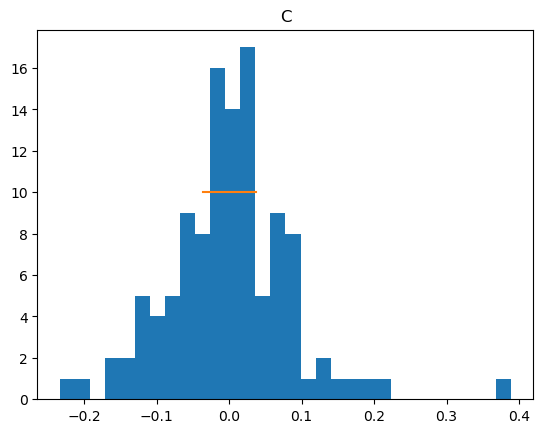

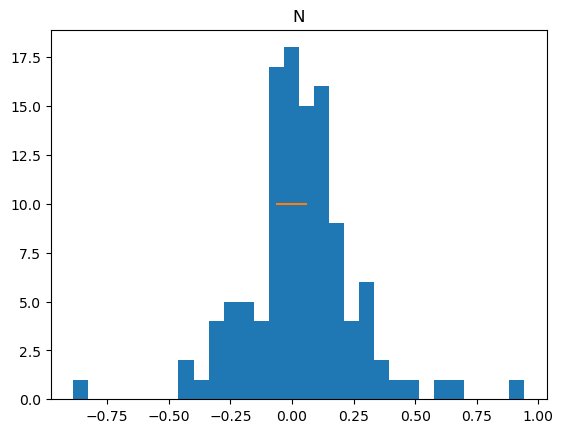

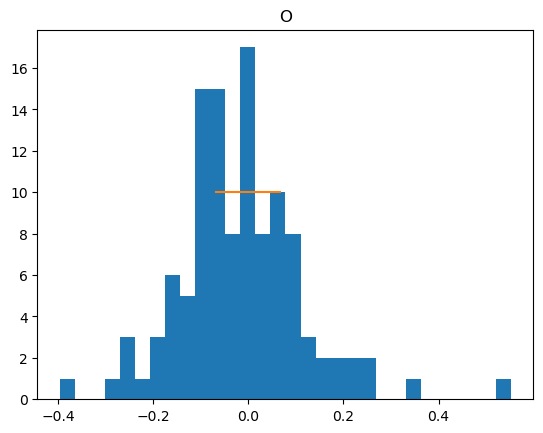

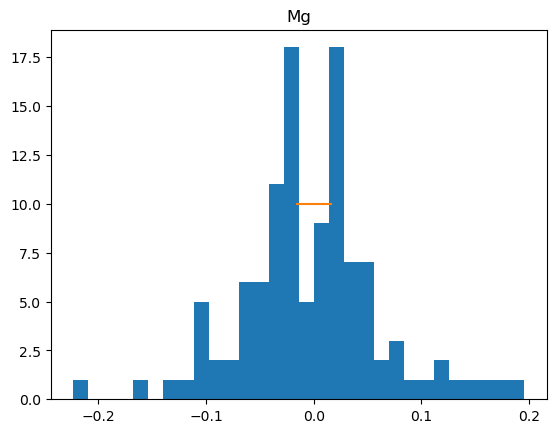

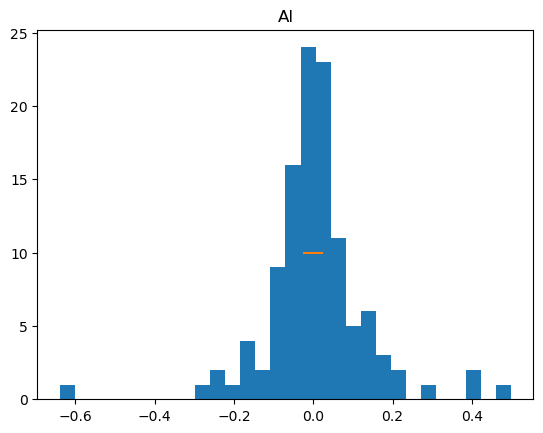

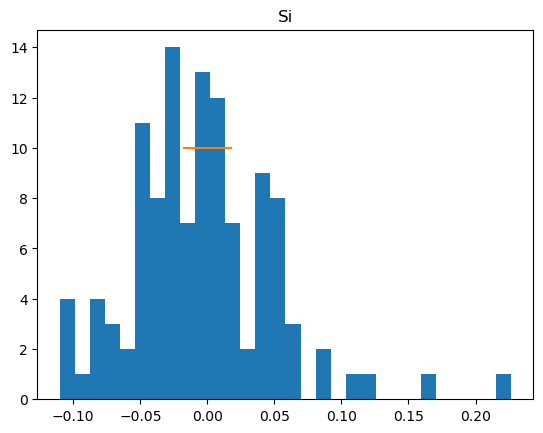

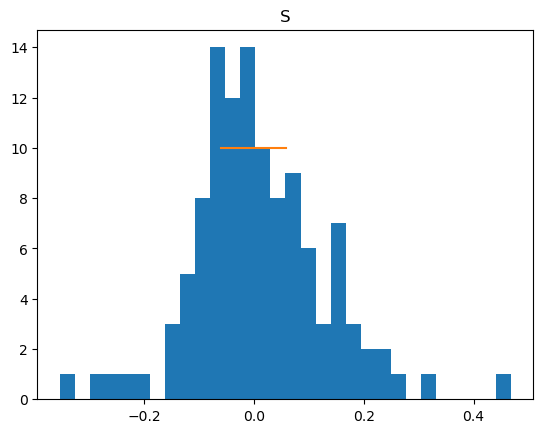

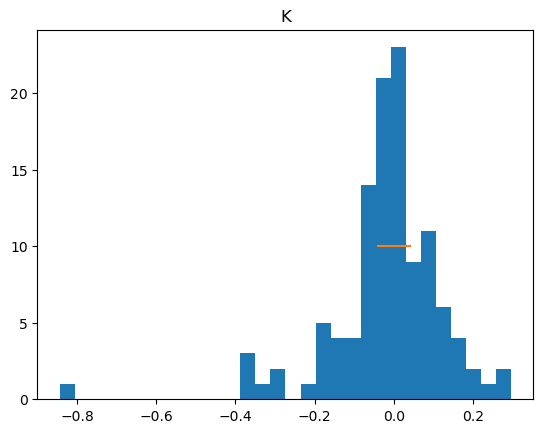

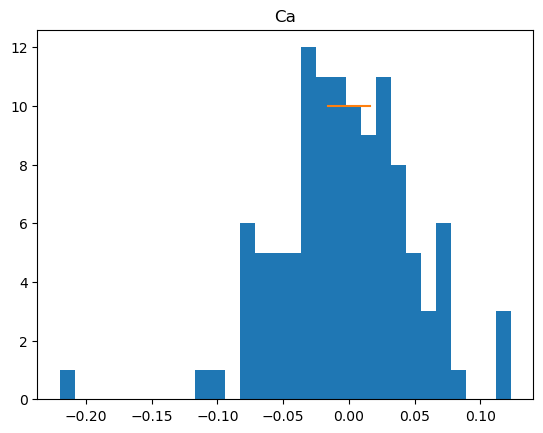

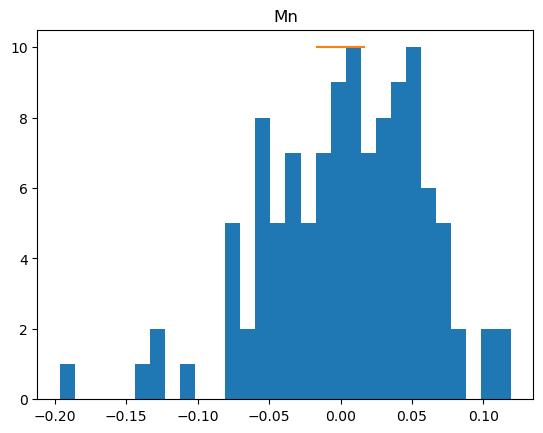

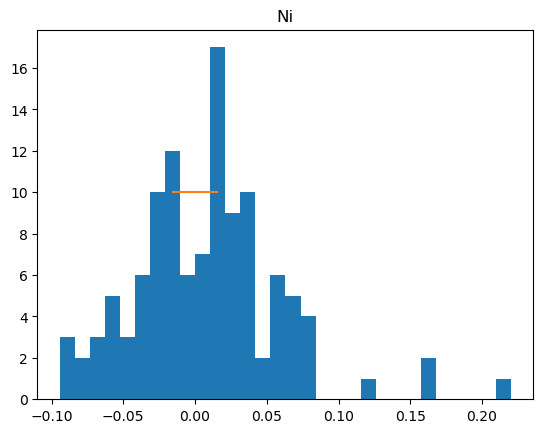

In [71]:
els = ['C', 'N', 'O', 'Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni', 'Ce']
for el in els:
    try:
        plt.hist(dopped['[{}/Fe]_1'.format(el)].astype(float) - dopped['[{}/Fe]_2'.format(el)].astype(float), bins=30)
        plt.plot([-1*np.nanmean(dopped['e_[{}/Fe]_1'.format(el)].astype(float)), np.nanmean(dopped['e_[{}/Fe]_1'.format(el)].astype(float))], [10,10])
        plt.title(el)
        plt.show()
    except:
        pass